In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(tibble)
library(patchwork)


meta <- readRDS("../../MF1/overview/load_files/Reanno_E37-110.org.meta.10052022.rds")
meta$subtype <- gsub("InN HMX1", "InN HMX2", meta$subtype)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
table(meta$lobe)


    FC     GE Insula    MSC     OC     TC 
184219 146557  16353 148821 128597 136982 

[1] 50163    15

`summarise()` has grouped output by 'subtype'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'subtype'. You can override using the `.groups` argument.



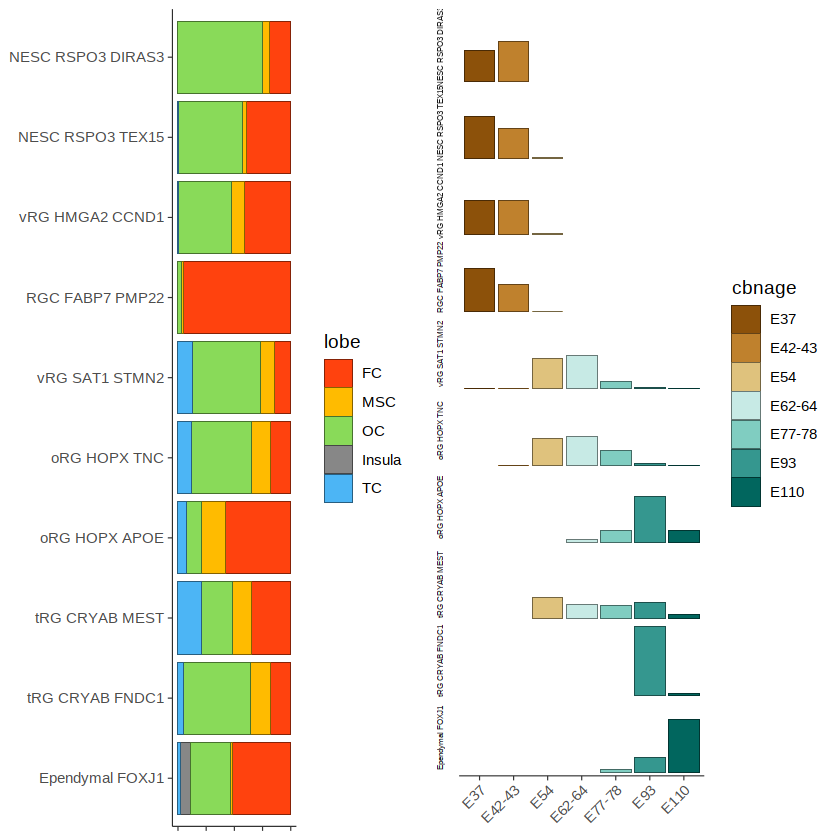

In [3]:
cls_ord <- c("NESC RSPO3 DIRAS3", "NESC RSPO3 TEX15", 
             "vRG HMGA2 CCND1", "RGC FABP7 PMP22", "vRG SAT1 STMN2", 
             "oRG HOPX TNC", "oRG HOPX APOE", 
             "tRG CRYAB MEST", "tRG CRYAB FNDC1", "Ependymal FOXJ1")
meta <- meta[meta$subtype %in% cls_ord, ]
dim(meta)

split.by <- "lobe"
reg_cols <- c("#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4") %>% 
                setNames(., c("FC", "MSC", "TC", "OC", "Insula", "GE"))
age_cols <- c("#8c510a", "#bf812d", "#dfc27d", "#c7eae5", "#80cdc1", "#35978f", "#01665e") %>% 
                setNames(., c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))


split.by <- "lobe"
p1_data <- meta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = rev(cls_ord))) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                                levels = switch(split.by, 
                                            lobe = c("FC", "MSC", "OC", "Insula", "TC"), 
                                            cbnage = c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))))


p1 <- ggplot(p1_data, aes_string(x = "size", y = "subtype", fill = "lobe")) +
                geom_bar(color = "black", position = position_stack(reverse = FALSE), stat = "identity", lwd = 0.1) +
                ##lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = reg_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                theme(axis.line=element_line(size = 0.2), axis.ticks=element_line(size = 0.25), 
                      axis.text.x = element_blank(), axis.title = element_blank())


split.by <- "cbnage"
p2_data <- meta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = cls_ord)) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                                levels = switch(split.by, 
                                            lobe = c("FC", "MSC", "OC", "Insula", "TC"), 
                                            cbnage = c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))))


p2 <- ggplot(p2_data, aes_string(x = "cbnage", y = "size", fill = "cbnage")) +
                geom_bar(color = "black", stat = "identity", lwd = 0.1) +
                ##lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = age_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                scale_x_discrete(limits = names(age_cols)) +
                RotatedAxis() + 
                facet_wrap(vars(subtype), nrow = length(cls_ord), ncol = 1, strip.position = "left") +
                theme(strip.background = element_blank(), 
                    strip.placement = "outside", panel.spacing = unit(0.01, "in"), 
                    axis.line.x=element_line(size = 0.2), axis.line.y=element_blank(), 
                    axis.ticks.x=element_line(size = 0.25), axis.ticks.y=element_blank(), 
                    axis.text.x = element_text(size = rel(1)), axis.text.y = element_blank(), 
                    axis.title = element_blank(),
                    strip.text.y.left = element_text(size = rel(0.5)))
##pcbn <- patchwork::wrap_plots(list(p1, p2), nrow = 1, ncol = 2)
pcbn <- cowplot::plot_grid(p1, p2, nrow = 1, ncol = 2)
pcbn

In [4]:
pdf(paste0("./report/", "RGC_age_region_contribution_v1.pdf"), width = 6, height = 6)
print(pcbn)
dev.off()

png 
  2

In [5]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 tibble_3.0.1    ggplot2_3.3.0   dplyr_1.0.7    
[5] Seurat_3.1.5   

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.6         